In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/violent-crime-rates-by-us-state/US_violent_crime.csv


In [2]:
# Assign sets important according to segmentations preparation. 
# Consuquently segmentation sets has to be controlled by experts


df = pd.read_csv("/kaggle/input/violent-crime-rates-by-us-state/US_violent_crime.csv").copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Exploratory Data Analysis

In [3]:
# firstly lets do it index 'Unnamed: 0' value in observation units

df.index = df.iloc[:,0]
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [5]:
# stil during 'Unnamed: 0' let's get out of the list

df = df.iloc[:,1:5]
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
df.index.name = "Index"
df.head()

,Murder,Assault,UrbanPop,Rape
Index,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [7]:
# Let's see if I have any missing observations

df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
# here all of them have to be numerical values. Here we have made it this too

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


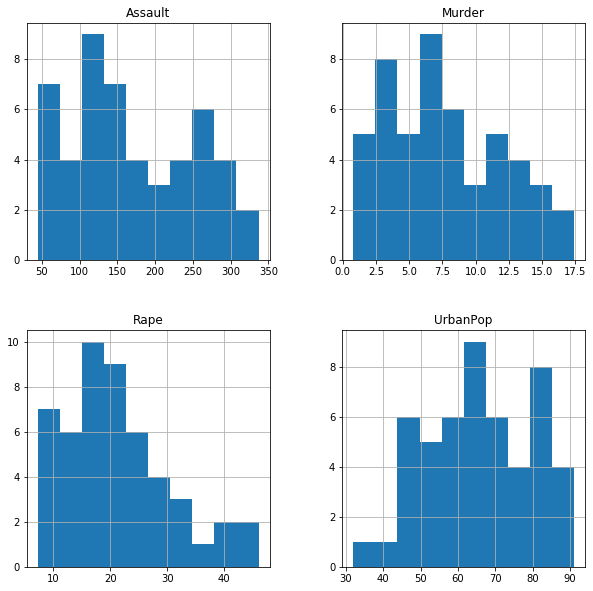

In [10]:
# here it is appropriate to visualize the data to try to understand it.
# For example, 3 Assault (Assault) histogram looks like 3 peaks or accumulation.

df.hist(figsize = (10,10));

# K-MEANS Model and Visualizations

In [11]:
# The number of part sand (n_cluster) we need to determine per work can be the same as the number of variables we need to concentrate on.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
# lets look model properties

#?kmeans

In [13]:
k_fit = kmeans.fit(df)

In [14]:
# Let's create the chunks of the model to be fit

k_fit.n_clusters

4

In [15]:
# create the centers of these sets

k_fit.cluster_centers_

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

## Visualizations

In [16]:
# If I want to visualize, now let's reduce the set numbers to 2
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)              

In [17]:
sets = k_fit.labels_

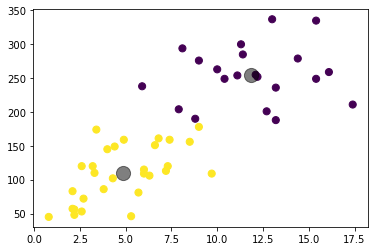

In [18]:
# Let's visualize the data we reduced to 2 sets.

plt.scatter(df.iloc[:,0], df.iloc[:,1], c = sets, s = 50, cmap = "viridis")

centers = k_fit.cluster_centers_                                 # We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5);

In [19]:
# Let us import 3D visualization. Otherwise it is necessary to download

from mpl_toolkits.mplot3d import Axes3D


# Let's create our sets again, this time it will be 3 dimensional variable

kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
sets = k_fit.labels_
centers = kmeans.cluster_centers_

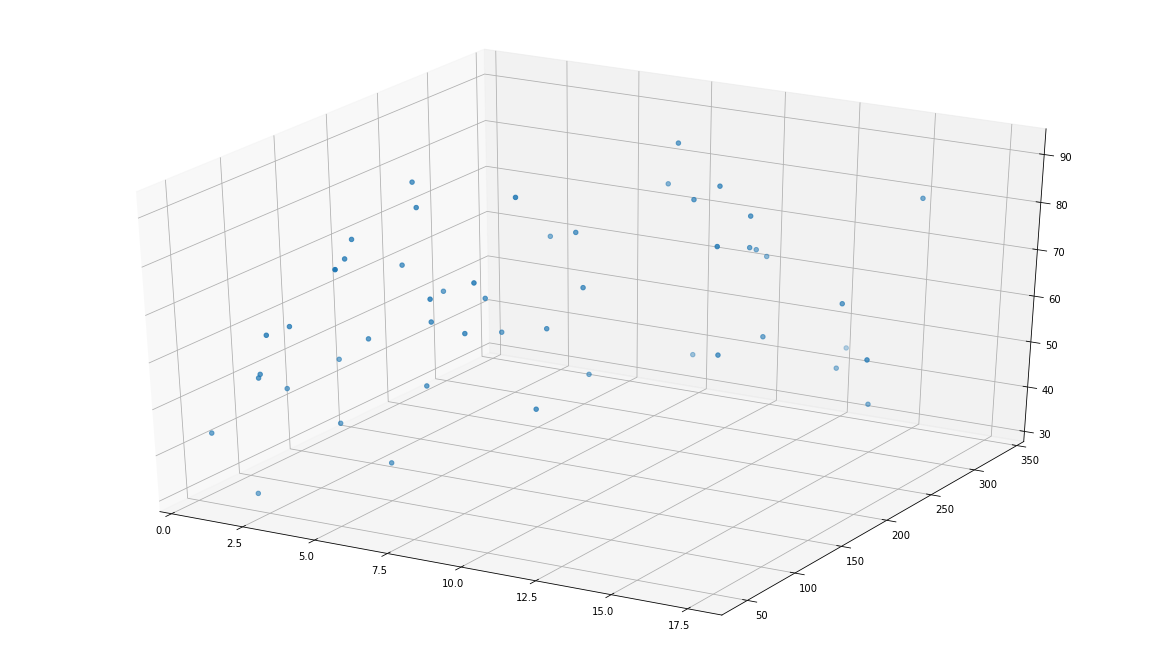

In [20]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

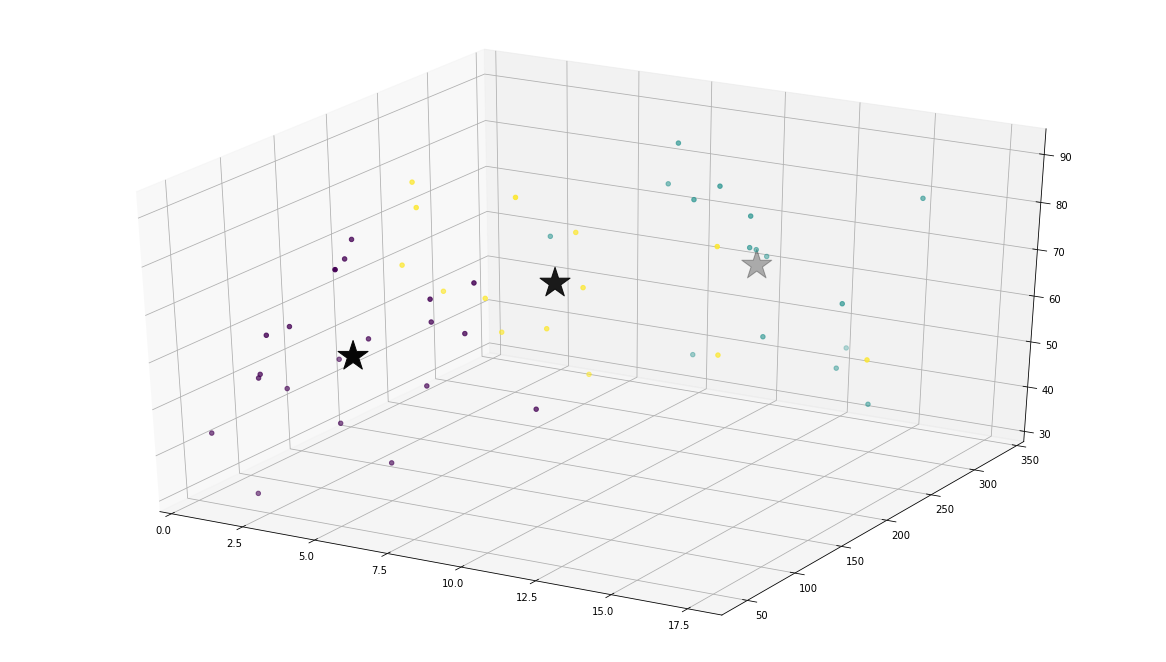

In [21]:
# Let's look at the visualization of these sets and centers on the plot.

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=sets)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

## Sets and observation units

In [22]:
# To provide cluster numbers and information about which states (observations) these numbers belong to
# If we want, we can take the model with 2 variables or 3 variables above, let's take the 3 ones

kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
sets = k_fit.labels_

In [23]:
# to see which set and index you have for the top 10 states

pd.DataFrame({"Provinces" : df.index, "Sets": sets})[0:15]

,Provinces,Sets
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


In [24]:
# to look at the set number that each belongs to

df["set_no"] = sets

df.head()

,Murder,Assault,UrbanPop,Rape,set_no
Index,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


In [25]:
# eger kume no 0 dan basliyorsa biz 1 den baslamasini istiyorsak soyle yapabiliriz

df["set_no"] = df["set_no"] + 1

df.head()

,Murder,Assault,UrbanPop,Rape,set_no
Index,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1


## Determination of Optimum Set Number

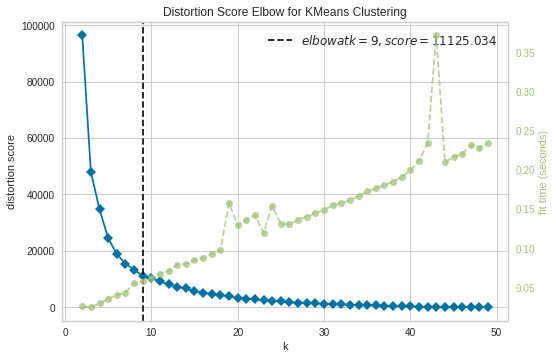

In [26]:
# It is called one from 2 to 50. The number of sets should decrease, because we should approach zero, because we reduce the sands.
# When you have 10 thousand customers, you are not interested in 100 people. It is necessary to put the customers with high degrees or features into a segment(sets).
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df) 
visualizer.poof()  

# We understand the presentation from gorsel each point segment (set), ie, the set of elements with similar properties in it
# For example, when the customer enters our site, a presentation can be made about what the monthly income it brings to us.

In [27]:
# Let's take our model above again
# To provide cluster numbers and information about which states (observations) these numbers belong to
# If we want we can take the model with 2 variables or 3 variables above, let's take the 4 normal ones

kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
sets = k_fit.labels_

In [28]:
# to see which set and index you have for the top 10 states

pd.DataFrame({"Provinces" : df.index, "Sets": sets})[0:10]

,Provinces,Sets
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,3
4,California,1
5,Colorado,3
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,3


# Hierarchical Clustering

In [29]:
df = pd.read_csv("/kaggle/input/violent-crime-rates-by-us-state/US_violent_crime.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.index.name = "Index"
df.head()

,Murder,Assault,UrbanPop,Rape
Index,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [30]:
from scipy.cluster.hierarchy import linkage

hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [31]:
# We can watch its features and see what it does

dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

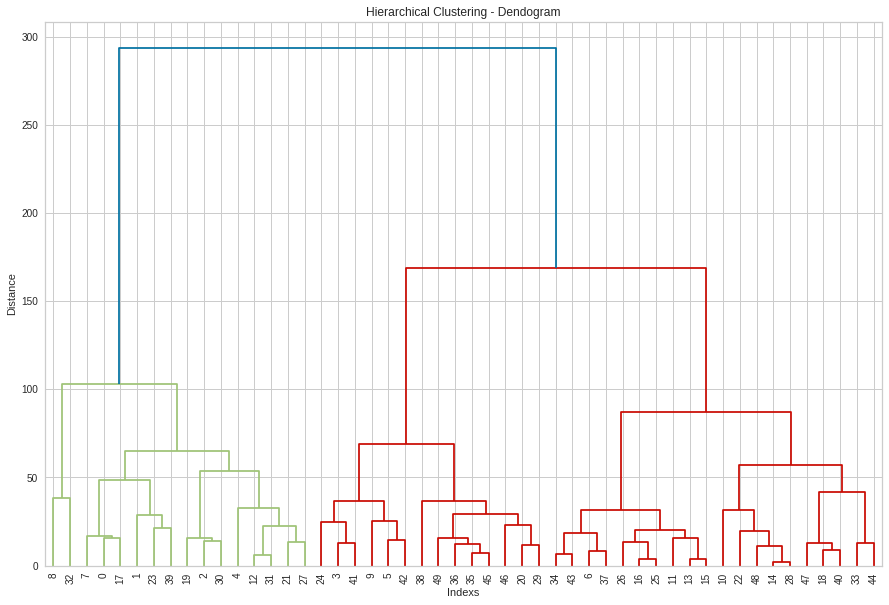

In [32]:
# We need to create Dendogram

from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexs')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

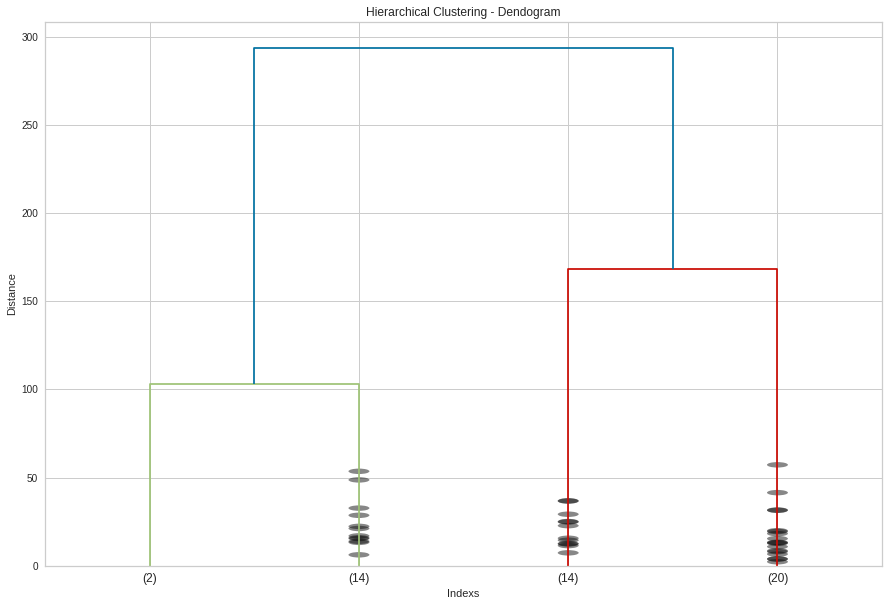

In [33]:
# another form of representation and the number of elements below it

from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexs')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

## Optimum Set Number

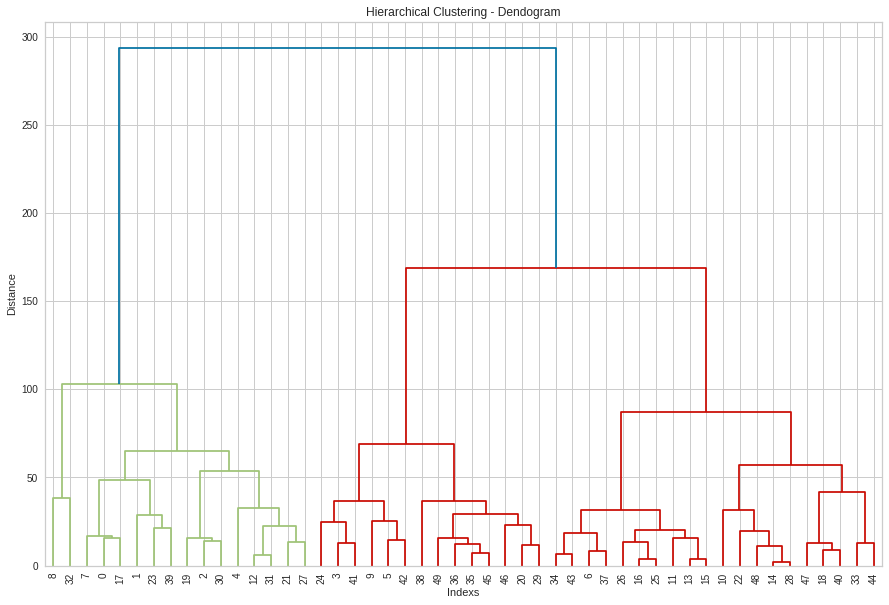

In [34]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexs')
plt.ylabel('Distance')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [35]:
#?den

In [36]:
#?dendrogram

In [37]:
# When we look at the dendogram, it will be logical to divide it into 4 large clusters. Then we say n_cluster = 4.

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [38]:
# if we want to see which state is in which bank

pd.DataFrame({"Provinces" : df.index, "Sets": cluster.fit_predict(df)})[0:10]

,Provinces,Sets
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [39]:
df["set_no"] = cluster.fit_predict(df)
df.head()

,Murder,Assault,UrbanPop,Rape,set_no
Index,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


# Conclusion



    1. If this tutorial is not enough you can check also https://www.picostat.com/dataset/r-dataset-package-datasets-usarrests

    2. I used here K_Means and Hierarchical Clustering Model but you can try also PCA Model. Results of both models:

    3. After this tutorial, my aim is to prepare 'kernel' which is connected to Deep Learning 'not clear' data set.
   
 If you have any suggestions, please could you write for me? I wil be happy for comment and critics!
 
 
 Thank you for your suggestion and votes ;)

